In [1]:
import torch
import torch.nn
import pandas as pd

/root/miniconda3/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First setup the dictionaries to mapp from chars to positions.

In [2]:
characters = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
print(characters)
print(len(characters))
character_to_integer = dict((c, i) for i, c in enumerate(characters))
integer_to_character = dict((i, c) for i, c in enumerate(characters))
print(character_to_integer)
print(integer_to_character)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ',', ';', '.', '!', '?', ':', "'", '"', '/', '\\', '|', '_', '@', '#', '$', '%', '^', '&', '*', '~', '`', '+', '-', '=', '<', '>', '(', ')', '[', ']', '{', '}']
94
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'a': 26, 'b': 27, 'c': 28, 'd': 29, 'e': 30, 'f': 31, 'g': 32, 'h': 33, 'i': 34, 'j': 35, 'k': 36, 'l': 37, 'm': 38, 'n': 39, 'o': 40, 'p': 41, 'q': 42, 'r': 43, 's': 44, 't': 45, 'u': 46, 'v': 47, 'w': 48, 'x': 49, 'y': 50, 'z': 51, '0': 52, '1': 53, '2': 54, '3': 55, '4': 56, '5': 57, '6': 58, '7'

Let us no look at how a SMILE string gets mapped to indices

In [3]:
test_str = "[2H]C1=C(C(=C(C(=C1NC(=O)C)[2H])[2H])O)[2H]"
integer_encoded = [character_to_integer[char] for char in test_str]
print(integer_encoded)
print(len(integer_encoded))


[90, 54, 7, 91, 2, 53, 85, 2, 88, 2, 88, 85, 2, 88, 2, 88, 85, 2, 53, 13, 2, 88, 85, 14, 89, 2, 89, 90, 54, 7, 91, 89, 90, 54, 7, 91, 89, 14, 89, 90, 54, 7, 91]
43


Let's create a one-hot encoding function

In [4]:
def one_hot_encode(target, character_set_len:int):
    one_hot = list()
    for value in target:
        #first make everything a 0
        L = [0 for _ in range(character_set_len)]
        # now add one at the position of this character
        L[value] = 1
        one_hot.append(L)
    return one_hot


Test one-hot encoding

In [5]:
one_hot=one_hot_encode(integer_encoded,len(characters))
print(one_hot)
print(len(one_hot)) #43 one-hot vectors of size 94
print(len(one_hot[0]))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Create a data set from the smiles data. The data has 1,129,199 rows. The smiles data has string with average size of 56, max size of 1329. But there are 1,061,957 row with size less than 100. So, we will use that becuase it is 94% of the data.

In [6]:
from torch.utils.data import Dataset
class SMILESDataSet(Dataset):
    def __init__(self, smiles_file, train=True, max_str_len = 100, transform=None, target_transform=None):
        super(SMILESDataSet, self).__init__()
        self.smiles_file = smiles_file
        self.max_str_len = max_str_len
        if(train == True):
            self.size = 200000
        else:
            self.size = 50000
        self.transform = transform
        self.target_transform = target_transform
        #character set
        self.characters = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
        self.character_to_integer = dict((c, i) for i, c in enumerate(characters))
        self.integer_to_character = dict((i, c) for i, c in enumerate(characters))
        
        #open csv
        self.smiles_csv = pd.read_csv(smiles_file)
        #filter out those lines with canonical smiles string longer than 100
        self.smiles_csv = self.smiles_csv[self.smiles_csv.apply(lambda x: len(x['CanonicalSMILES']) <= 100, axis=1)]
        #sample data based on size
        self.smiles_data =  self.smiles_csv.sample(n=self.size).reset_index()
    
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        #print("Index: ", idx)
        #print("Row: \n", self.smiles_data.iloc[idx])
        X = self.smiles_data.iloc[idx, 3] # Canonical smiles
        #print("X: ", X)
        y = self.smiles_data.iloc[idx, 5] # molecular weight
        #print("y: ", y)
        label = torch.tensor(y, dtype=torch.float32)
        #label = torch.FloatTensor(y)
        data = self.one_hot_encode(X, len(self.characters))
        data = torch.tensor(data, dtype=torch.float32)
        #data = torch.FloatTensor(data)
        #print("data.shape: ", data.shape)
        data = data.transpose(0, 1)
        return data, label
    
    def one_hot_encode(self, target, character_set_len:int):
        integer_encoded = [self.character_to_integer[char] for char in target]
        one_hot = list()
        for value in integer_encoded:
            #first make everything a 0
            L = [0 for _ in range(character_set_len)]
            # now add one at the position of this character
            L[value] = 1
            one_hot.append(L)
        one_hot = self.zero_pad(one_hot, self.max_str_len, character_set_len)
        return one_hot
    
    def zero_pad(self, one_hot, max_str_len, character_set_len):
        L = [0 for _ in range(character_set_len)]
        while (len(one_hot) < max_str_len):
            one_hot.append(L)
        return one_hot
    

        


Create a data set and training set and setup their data loaders
batch_size = 10


In [7]:
from torch.utils.data import DataLoader
smiles_file = "./master_corpus2.csv"
training_data = SMILESDataSet(smiles_file, train=True)
print("training data len: ", training_data.__len__())
test_data = SMILESDataSet(smiles_file, train=False)
print("test data len: ", test_data.__len__())

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

training data len:  200000
test data len:  50000


Lets see a few items from the training set

In [8]:
train_features, train_labels = next(iter(train_dataloader))
print("train_features.shape", train_features.shape)
print("train_labels.shape", train_labels.shape)
C = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
print("len(C): " , len(C))
print("train features[0]", train_features[0] )
print("train labels[0[]]", train_labels[0] )


train_features.shape torch.Size([64, 94, 100])
train_labels.shape torch.Size([64])
len(C):  94
train features[0] tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
train labels[0[]] tensor(231.0900)


Now the create then NN model

In [9]:
import torch.nn as nn

class CharacterLevelCNN(nn.Module):
    def __init__(self, input_length, input_dim, n_conv_filters, n_fc_neurons=128, kernel_size=7, padding=0):
        super(CharacterLevelCNN, self).__init__()

        self.conv1 = nn.Sequential(nn.Conv1d(input_dim, n_conv_filters, kernel_size, stride=1, padding=padding), nn.ReLU(),
                                   nn.MaxPool1d(3)) 
        self.conv2 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size, stride=1, padding=padding), nn.ReLU(),
                                   nn.MaxPool1d(3))
        self.conv3 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.conv4 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.conv5 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.fc1 = nn.Sequential(nn.Linear(input_length, n_fc_neurons), nn.ReLU(), nn.Dropout(0.2))  
        self.fc2 = nn.Sequential(nn.Linear(n_fc_neurons, 64), nn.ReLU(),nn.Dropout(0.2))  
        self.fc3 = nn.Sequential(nn.Linear(64, 32), nn.ReLU(),nn.Dropout(0.2))  
        self.fc4 = nn.Sequential(nn.Linear(32, 1))   

    def forward(self, X):
        output = self.conv1(X)
        output = self.conv2(output)
        output = self.conv3(output)
        output = self.conv4(output)
        output = self.conv5(output)
        output = output.view(output.shape[0], -1)
        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        output = self.fc4(output)

        return output

model =  CharacterLevelCNN(128, 94, 64)
print("train_features,shape: ", train_features.shape)
out = model(train_features)  
#M = out.view(10, -1)
print("out.shape: ", out.shape)     
#print("M.shape: ", M.shape)     
  

train_features,shape:  torch.Size([64, 94, 100])
out.shape:  torch.Size([64, 1])


Look at the network

In [10]:
from torchinfo import summary
summary(model, input_size=train_features.shape, device='cpu', col_names=['input_size', 'output_size',
                                                                               'num_params'])


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CharacterLevelCNN                        [64, 94, 100]             [64, 1]                   --
├─Sequential: 1-1                        [64, 94, 100]             [64, 64, 31]              --
│    └─Conv1d: 2-1                       [64, 94, 100]             [64, 64, 94]              42,176
│    └─ReLU: 2-2                         [64, 64, 94]              [64, 64, 94]              --
│    └─MaxPool1d: 2-3                    [64, 64, 94]              [64, 64, 31]              --
├─Sequential: 1-2                        [64, 64, 31]              [64, 64, 8]               --
│    └─Conv1d: 2-4                       [64, 64, 31]              [64, 64, 25]              28,736
│    └─ReLU: 2-5                         [64, 64, 25]              [64, 64, 25]              --
│    └─MaxPool1d: 2-6                    [64, 64, 25]              [64, 64, 8]               --
├─Sequential: 1-3          

setup device

In [11]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("device: ", device)
model = model.to(device)

device:  cuda


Setup cost criterion and optimizer

In [12]:
#Cost function
criterion = torch.nn.MSELoss().to(device)

optimizer = torch.optim.Adam(model.parameters())

Training loop

In [13]:
#arrat to keep loss after each iteration
loss_list = []
# number of iterations
epochs = 20

In [14]:
for e  in range(epochs):
    running_loss = 0.
    last_lost = 0.
    for i, data in enumerate(train_dataloader):
        X, Y = data
        X = X.to(device)
        Y = Y.to(device)
        #setup optimizer to zero grandients
        optimizer.zero_grad()
        # Make predictions for the all the examples in X (vectorization)
        Y_pred = model.forward(X)
        # now calculate the loss 
        Y = Y.unsqueeze(1)
        loss = criterion(Y_pred, Y)
        #append the lost to the list
        #loss_list.append(loss.item())
        #back propagation step
        loss.backward()
        #parameter update
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            loss_list.append(last_loss)
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            #tb_x = epoch_index * len(training_loader) + i + 1
            #tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.
    # print diagnostic data
    #print('{}, \t{}, \t{}'.format(i, loss.item(), [param.data for param in model.parameters()]))

    #with torch.no_grad():




  batch 1000 loss: 11357.743201049805
  batch 2000 loss: 5130.447984863281
  batch 3000 loss: 5039.651361083985
  batch 1000 loss: 4822.761153564453
  batch 2000 loss: 4825.976602294922
  batch 3000 loss: 4783.532752441406
  batch 1000 loss: 4710.135081665039
  batch 2000 loss: 4673.296012451172
  batch 3000 loss: 4675.070395996094
  batch 1000 loss: 4567.100827636718
  batch 2000 loss: 4650.040524658203
  batch 3000 loss: 4741.164719482422
  batch 1000 loss: 4509.7056632080075
  batch 2000 loss: 4535.630877929688
  batch 3000 loss: 4543.570442382813
  batch 1000 loss: 4452.184015136719
  batch 2000 loss: 4415.278309692383
  batch 3000 loss: 4522.245423583984
  batch 1000 loss: 4310.082548828125
  batch 2000 loss: 4291.291946166993
  batch 3000 loss: 4352.16100402832
  batch 1000 loss: 4225.487944946289
  batch 2000 loss: 4258.99132800293
  batch 3000 loss: 4376.508322265625
  batch 1000 loss: 4174.388212158203
  batch 2000 loss: 4134.180679931641
  batch 3000 loss: 4185.375299194336
 

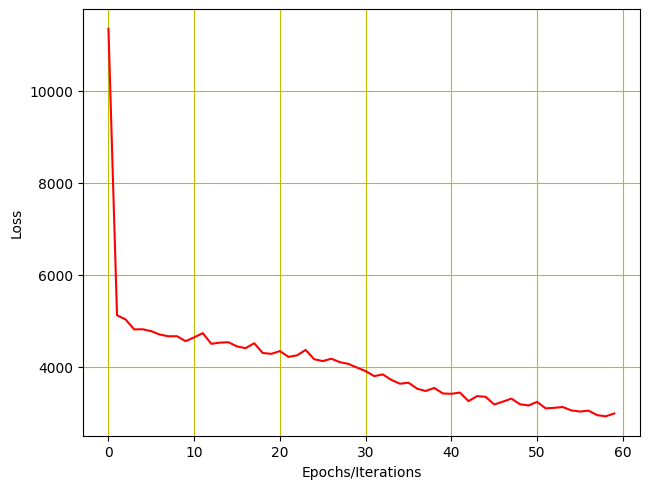

In [15]:
import matplotlib.pyplot as plt
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

Save the model

In [16]:
PATH = './mymodelkr.pth'
torch.save(model.state_dict(), PATH)